<a href="https://colab.research.google.com/github/Darius-BOUL/Prix_des_maisons/blob/main/Imobilier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:

<h1 align="center"><font size="5">Project: Ventes de maisons dans le comté de King, États-Unis</font></h1>


# Instructions


Dans cette mission, vous êtes un analyste de données travaillant dans une société de placement immobilier. La société souhaite commencer à investir dans l'immobilier résidentiel. Vous êtes chargé de déterminer le prix du marché d'une maison en fonction d'un ensemble de caractéristiques. Vous analyserez et prédirez les prix des logements à l'aide d'attributs ou de caractéristiques tels que la superficie en pieds carrés, le nombre de chambres, le nombre d'étages, etc. Il s'agit d'un modèle de cahier ; votre travail consiste à répondre aux dix questions.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
# URL du fichier CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"

df = pd.read_csv(url)

In [ ]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Affichez les types de données de chaque colonne à l'aide de la fonction dtypes.


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


Nous utilisons la méthode describe pour obtenir un résumé statistique du dataframe.


In [ ]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Question 2

Supprimez les colonnes <code>"id"</code> et <code>"Unnamed: 0"</code> de l'axe 1 à l'aide de la méthode <code>drop()</code>, puis utilisez la méthode <code>describe()</code> pour obtenir un résumé statistique des données.


In [ ]:
df.drop(['id','Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



Nous pouvons voir que nous avons des valeurs manquantes pour les colonnes <code> chambres </code> et <code> salles de bain </code>


In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Nous pouvons remplacer les valeurs manquantes de la colonne <code>'bedrooms'</code> par la moyenne de la colonne <code>'bedrooms' </code> en utilisant la méthode <code>replace()</code>. N'oubliez pas de définir le paramètre <code>inplace</code> sur <code>True</code>


In [ ]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)


Nous remplaçons également les valeurs manquantes de la colonne <code>'bathrooms'</code> par la moyenne de la colonne <code>'bathrooms' </code> en utilisant la méthode <code>replace()</code>. N'oubliez pas de définir le paramètre <code>inplace </code> top <code> True </code>


In [ ]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### Question 3

Utilisez la méthode <code>value_counts</code> pour compter le nombre de maisons avec des valeurs d'étage uniques, utilisez la méthode <code>.to_frame()</code> pour la convertir en trame de données.


In [ ]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

Utilisez la fonction <code>boxplot</code> de la bibliothèque seaborn pour déterminer si les maisons avec vue sur le front de mer ou sans vue sur le front de mer ont plus de valeurs aberrantes en termes de prix.


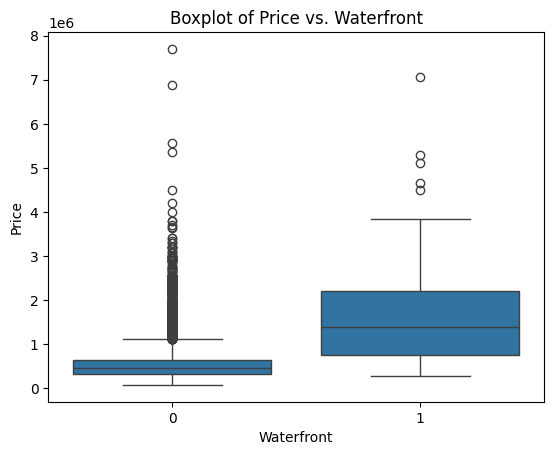

In [ ]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of Price vs. Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

### Question 5

Utilisez la fonction <code>regplot</code> de la bibliothèque Seaborn pour déterminer si la fonction <code>sqft_above</code> est corrélée négativement ou positivement avec le prix.


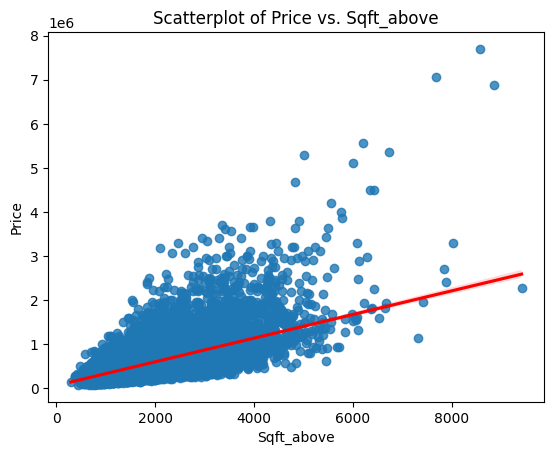

In [ ]:
sns.regplot(x='sqft_above', y='price', data=df, line_kws={'color': 'red'})
plt.title('Scatterplot of Price vs. Sqft_above')
plt.xlabel('Sqft_above')
plt.ylabel('Price')
plt.show()


Nous pouvons utiliser la méthode Pandas <code>corr()</code> pour trouver la fonctionnalité autre que le prix qui est la plus corrélée avec le prix.


In [ ]:
numeric_df = df.select_dtypes(include=[float, int])

# Calculer et trier les corrélations de 'price' avec les autres variables
correlation_with_price = numeric_df.corr()['price'].sort_values()

# Affichage du résultat
print(correlation_with_price)

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


Nous pouvons ajuster un modèle de régression linéaire en utilisant la fonction de longitude <code>'long'</code> et calculer le R^2.


In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Question  6

Ajustez un modèle de régression linéaire pour prédire le « prix » à l'aide de la fonction « sqft_living » puis calculez le R^2.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
X = df[['sqft_living']]
y = df['price']

# Diviser les données en ensemble de formation et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les prix avec l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le coefficient de détermination R^2
r2 = r2_score(y_test, y_pred)

# Afficher le résultat
print(f"Le R^2 du modèle est : {r2:.4f}")

Le R^2 du modèle est : 0.4941


### Question 7


Ajustez un modèle de régression linéaire pour prédire le « prix » à l'aide de la liste des fonctionnalités.


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Calculez ensuite le R^2.


In [ ]:
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les prix sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le coefficient de détermination R^2
r2 = r2_score(y_test, y_pred)

# Afficher le résultat
print(f"Le R^2 du modèle est : {r2:.4f}")


Le R^2 du modèle est : 0.6614


### This will help with Question 8

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Utilisez la liste pour créer un objet pipeline afin de prédire le « prix », ajustez l'objet à l'aide des fonctionnalités de la liste <code>features</code> et calculez le R^2.


In [ ]:
# Créer un pipeline avec les étapes de mise à l'échelle, régression polynomiale et régression linéaire
pipeline = Pipeline(Input)

# Ajuster le pipeline avec les données d'entraînement
pipeline.fit(X_train, y_train)

# Prédire les prix sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calculer le coefficient de détermination R^2
r2 = r2_score(y_test, y_pred)

# Afficher le résultat
print(f"Le R^2 du modèle est : {r2:.4f}")

Le R^2 du modèle est : 0.7112


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done



Nous allons diviser les données en ensembles d’entraînement et de test.


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Créez et ajustez un objet de régression Ridge à l'aide des données d'entraînement, définissez le paramètre de régularisation sur 0,1 et calculez le R^2 à l'aide des données de test.


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"Le R^2 du modèle Ridge est : {r2:.4f}")


Le R^2 du modèle Ridge est : 0.6614


### Question 10

Effectuez une transformation polynomiale du second ordre sur les données d'apprentissage et les données de test. Créez et ajustez un objet de régression Ridge à l'aide des données d'apprentissage, définissez le paramètre de régularisation sur 0,1 et calculez le R^2 à l'aide des données de test fournies.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_model.fit(X_train_poly, y_train)

y_pred = ridge_model.predict(X_test_poly)


r2 = r2_score(y_test, y_pred)

print(f"Le R^2 du modèle Ridge avec transformation polynomiale est : {r2:.4f}")


Le R^2 du modèle Ridge avec transformation polynomiale est : 0.7001



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

